#ID: 2022-1-60-319

In [3]:
pip install opencv-python matplotlib numpy


In [1]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. Apply salt and pepper noise to the Figure 3.1 and remove the noise using min and max filtering technique. Show input and output side by side.

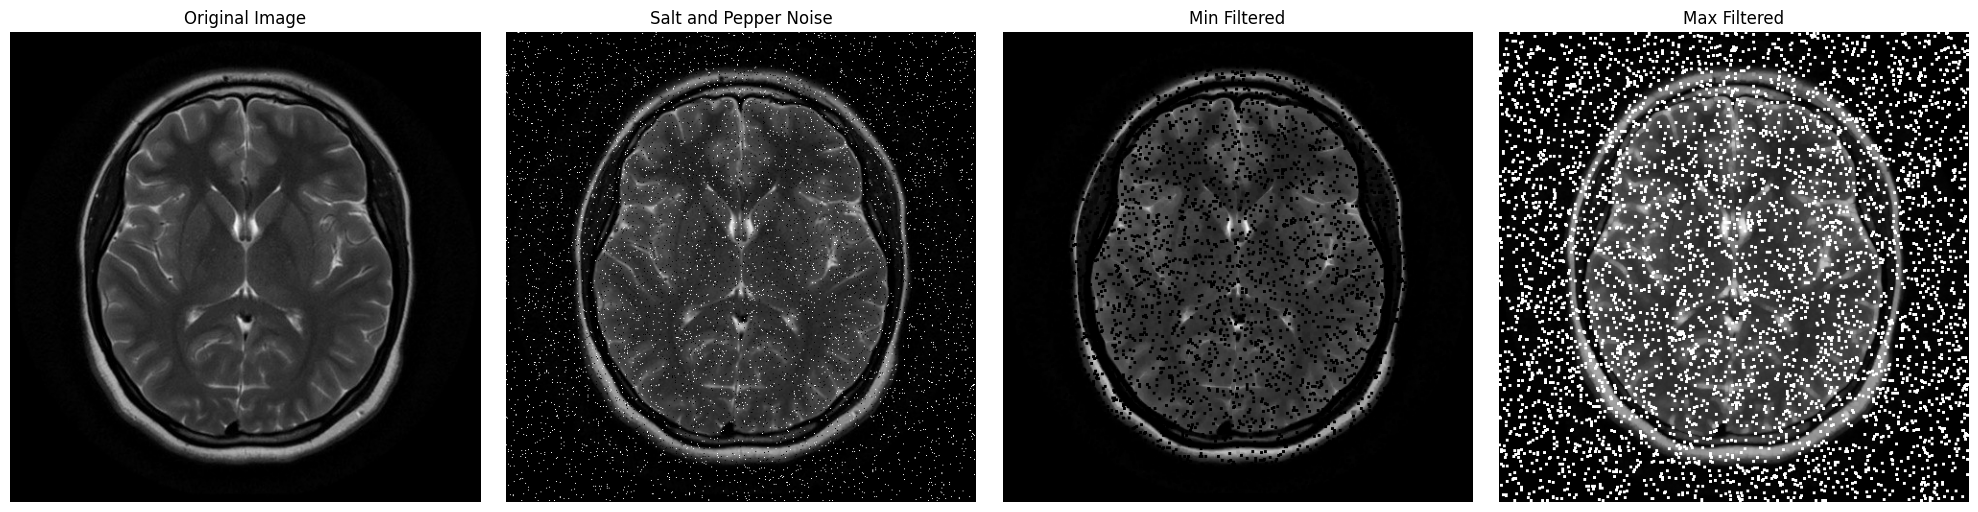

In [4]:
image = cv2.imread("/content/drive/MyDrive/CSE438/Picture1.jpg", cv2.IMREAD_GRAYSCALE)

def add_salt_pepper_noise(image, prob):
    output = np.copy(image)
    salt_coords = [np.random.randint(0, i - 1, int(prob * image.size)) for i in image.shape]
    output[salt_coords[0], salt_coords[1]] = 255
    pepper_coords = [np.random.randint(0, i - 1, int(prob * image.size)) for i in image.shape]
    output[pepper_coords[0], pepper_coords[1]] = 0
    return output

noisy_image = add_salt_pepper_noise(image, 0.02)

min_filtered = cv2.erode(noisy_image, np.ones((3, 3), np.uint8))

max_filtered = cv2.dilate(noisy_image, np.ones((3, 3), np.uint8))

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('Salt and Pepper Noise')
axs[1].axis('off')

axs[2].imshow(min_filtered, cmap='gray')
axs[2].set_title('Min Filtered')
axs[2].axis('off')

axs[3].imshow(max_filtered, cmap='gray')
axs[3].set_title('Max Filtered')
axs[3].axis('off')

plt.tight_layout()
plt.show()


##2. Apply Gaussian noise to the Figure 3.2 and remove the noise using Gaussian filtering. Show input and output side by side.

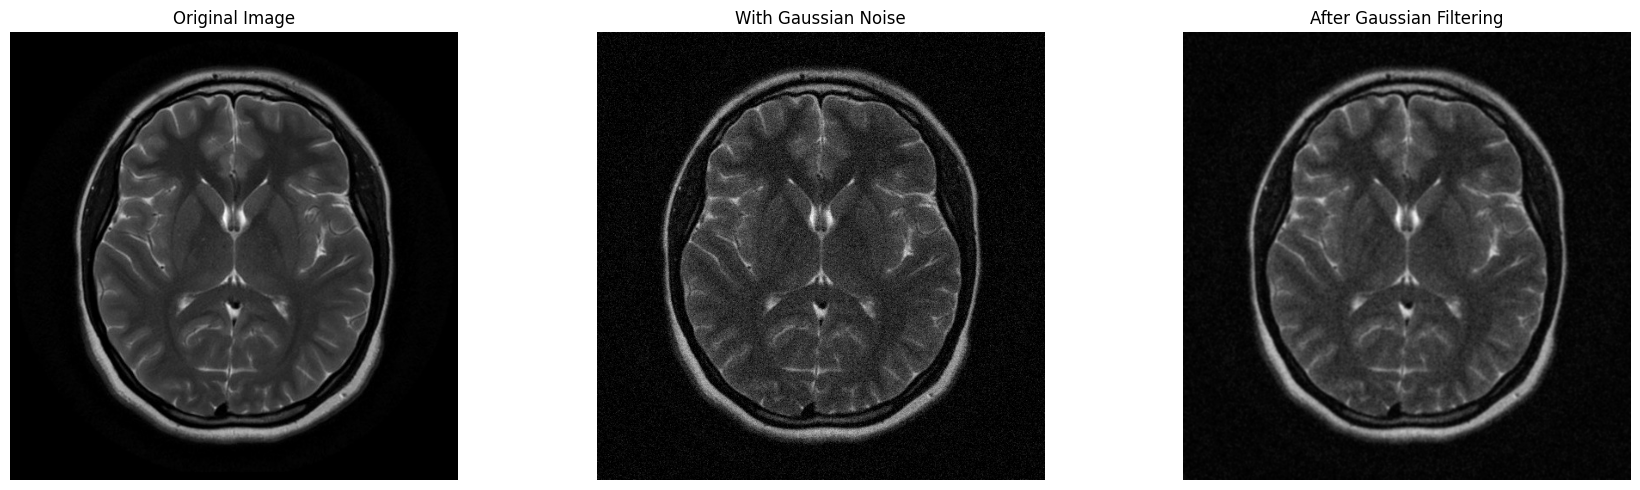

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/drive/MyDrive/CSE438/Picture2.jpg", cv2.IMREAD_GRAYSCALE)

def add_gaussian_noise(image, mean=0, sigma=15):
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gaussian
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

noisy_image = add_gaussian_noise(image)

gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 1)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('With Gaussian Noise')
axs[1].axis('off')

axs[2].imshow(gaussian_filtered, cmap='gray')
axs[2].set_title('After Gaussian Filtering')
axs[2].axis('off')

plt.tight_layout()
plt.show()


##3. Apply each of the following noises to Figure 3.3 and restore it using:

a) Box filtering
b) Average filtering
c) Median filtering

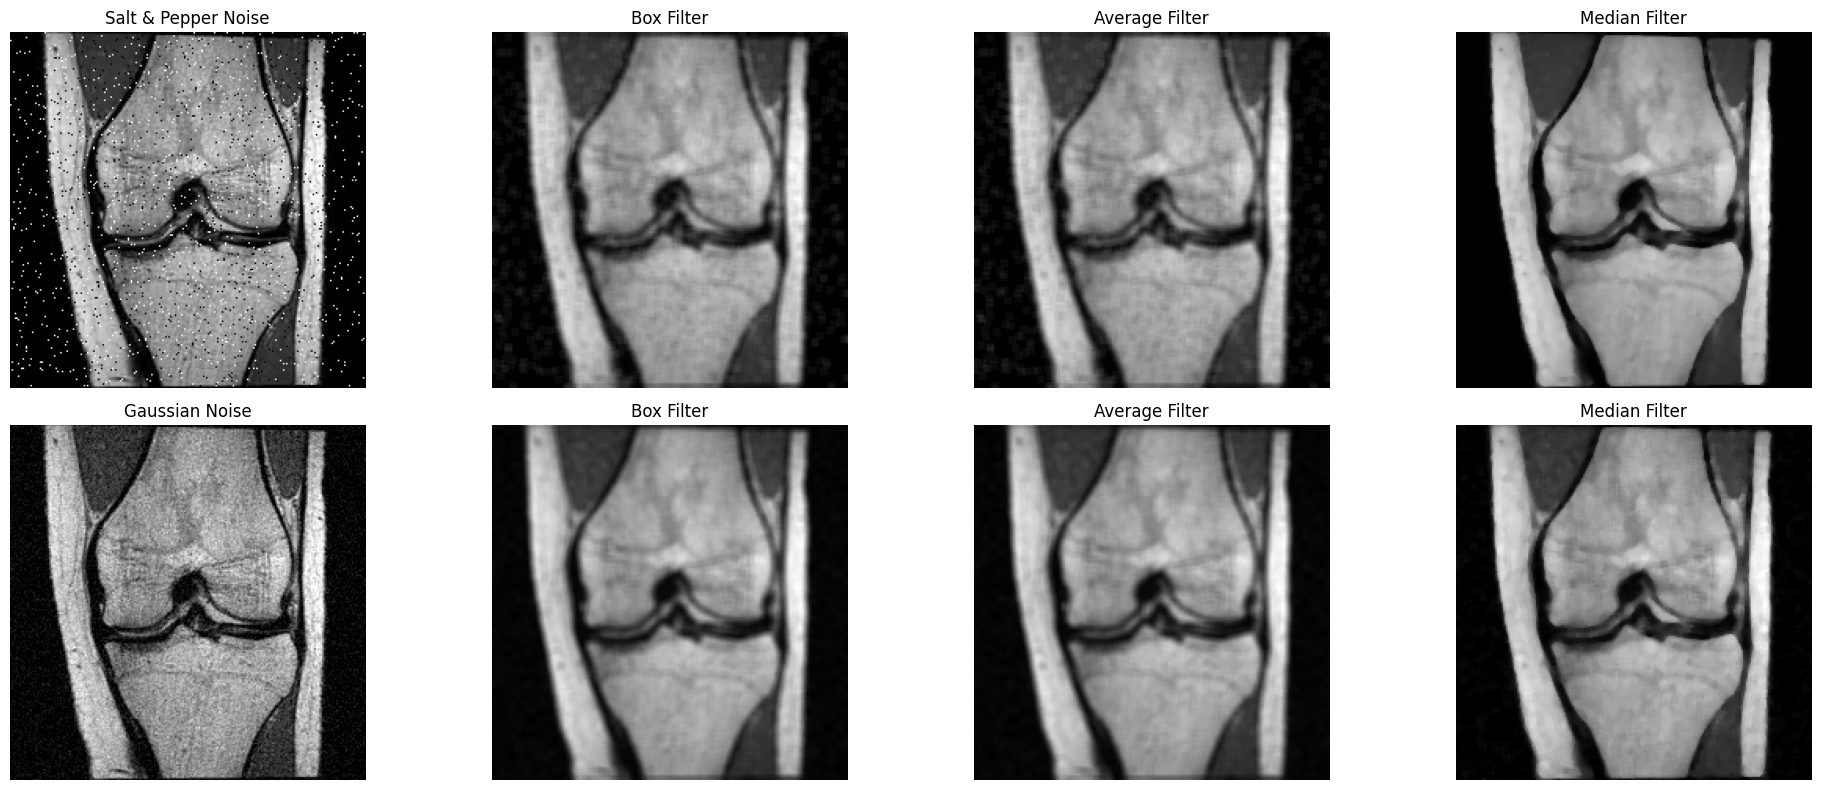

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/CSE438/Picture3.jpg', cv2.IMREAD_GRAYSCALE)

def add_salt_pepper_noise(image, prob=0.02):
    output = np.copy(image)
    salt = [np.random.randint(0, i - 1, int(prob * image.size)) for i in image.shape]
    pepper = [np.random.randint(0, i - 1, int(prob * image.size)) for i in image.shape]
    output[salt[0], salt[1]] = 255
    output[pepper[0], pepper[1]] = 0
    return output

def add_gaussian_noise(image, mean=0, sigma=15):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def apply_filters(noisy_img):
    box = cv2.boxFilter(noisy_img, ddepth=-1, ksize=(5, 5))
    avg = cv2.blur(noisy_img, ksize=(5, 5))
    median = cv2.medianBlur(noisy_img, 5)
    return box, avg, median

noise_types = {
    "Salt & Pepper": add_salt_pepper_noise,
    "Gaussian": add_gaussian_noise
}

fig, axs = plt.subplots(len(noise_types), 4, figsize=(20, 8))

for i, (name, noise_fn) in enumerate(noise_types.items()):
    noisy = noise_fn(image)
    box, avg, median = apply_filters(noisy)

    axs[i, 0].imshow(noisy, cmap='gray')
    axs[i, 0].set_title(f'{name} Noise')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(box, cmap='gray')
    axs[i, 1].set_title('Box Filter')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(avg, cmap='gray')
    axs[i, 2].set_title('Average Filter')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(median, cmap='gray')
    axs[i, 3].set_title('Median Filter')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()


###Task 4

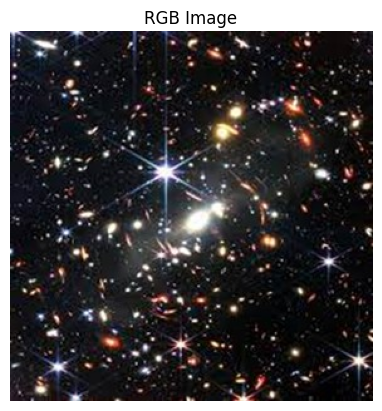

In [10]:
##A
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/CSE438/Picture4.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis('off')
plt.show()


In [11]:
##B
print("Matrix form of the image (pixel values):")
print(image_rgb)


Matrix form of the image (pixel values):
[[[232 234 255]
  [240 242 255]
  [251 251 255]
  ...
  [ 35  32  39]
  [ 47  44  51]
  [ 37  36  42]]

 [[157 159 180]
  [198 200 221]
  [239 239 255]
  ...
  [ 29  26  33]
  [ 42  39  46]
  [ 38  37  43]]

 [[ 71  76  98]
  [129 134 156]
  [200 202 227]
  ...
  [ 22  19  26]
  [ 33  30  37]
  [ 32  31  37]]

 ...

 [[ 46  33  43]
  [ 40  27  37]
  [ 36  23  33]
  ...
  [ 16  12   9]
  [ 22  19  14]
  [ 30  26  23]]

 [[ 47  34  44]
  [ 40  27  37]
  [ 36  23  33]
  ...
  [  7   4   0]
  [ 11   8   3]
  [ 12   8   5]]

 [[ 48  35  45]
  [ 41  28  38]
  [ 35  22  32]
  ...
  [  3   0   0]
  [  4   0   0]
  [  7   3   0]]]


In [13]:
##D
pixel_value = image_rgb[10, 78]
print(f"Pixel at (10, 78): {pixel_value}")


Pixel at (10, 78): [23 25 24]


###Task C using MatLab

In [ ]:
clc;
clear all;
close all;
img = imread('Picture4.jpg');
imshow(img);
title('Hover over the image to see pixel RGB values');

dcm = datacursormode(gcf);
set(dcm,'UpdateFcn',@myupdatefcn);
datacursormode on;

function txt = myupdatefcn(~, event_obj)
    pos = event_obj.Position;
    x = pos(1);
    y = pos(2);
    img = getimage(gca);
    x = max(min(round(x), size(img,2)), 1);
    y = max(min(round(y), size(img,1)), 1);

    % Get RGB values
    R = img(y,x,1);
    G = img(y,x,2);
    B = img(y,x,3);

    % Format the output text
    txt = {['X: ', num2str(x)], ['Y: ', num2str(y)], ...
           ['R: ', num2str(R)], ['G: ', num2str(G)], ['B: ', num2str(B)]};
end



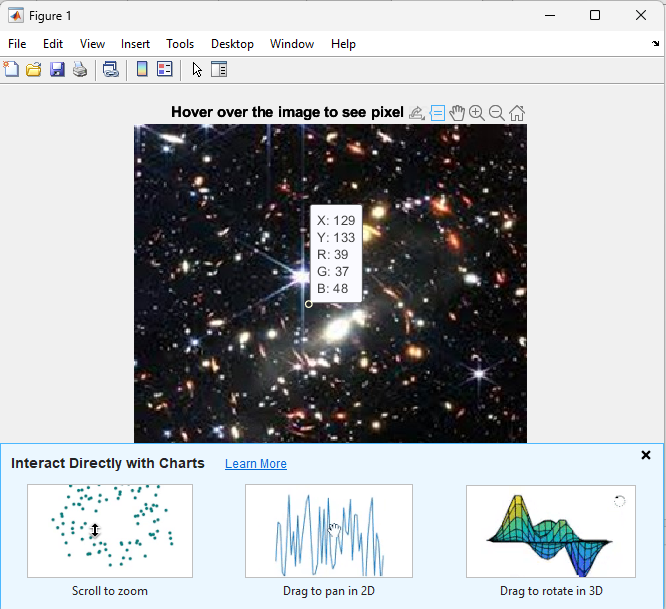

In [14]:
##E
height, width, channels = image_rgb.shape
print(f"Image size: {width} x {height}")
print(f"Number of channels: {channels}")


Image size: 289 x 295
Number of channels: 3


In [16]:
##F
print("Image Information:")
print(f"Dimensions: {image_rgb.shape}")
print(f"Height: {image_rgb.shape[0]}")
print(f"Width: {image_rgb.shape[1]}")
print(f"Channels: {image_rgb.shape[2]}")
print(f"Data type: {image_rgb.dtype}")
print(f"Total pixels: {image_rgb.size}")


Image Information:
Dimensions: (295, 289, 3)
Height: 295
Width: 289
Channels: 3
Data type: uint8
Total pixels: 255765


##Task 5

In [49]:
from PIL import Image

In [23]:
rgb_path = '/content/drive/MyDrive/CSE438/Picture5.png'
gray_path = '/content/drive/MyDrive/CSE438/Picture6.jpg'
indexed_path = '/content/drive/MyDrive/CSE438/Picture7.tif'


##a) Read and show all three types of images (RGB, Grayscale, andIndexed).

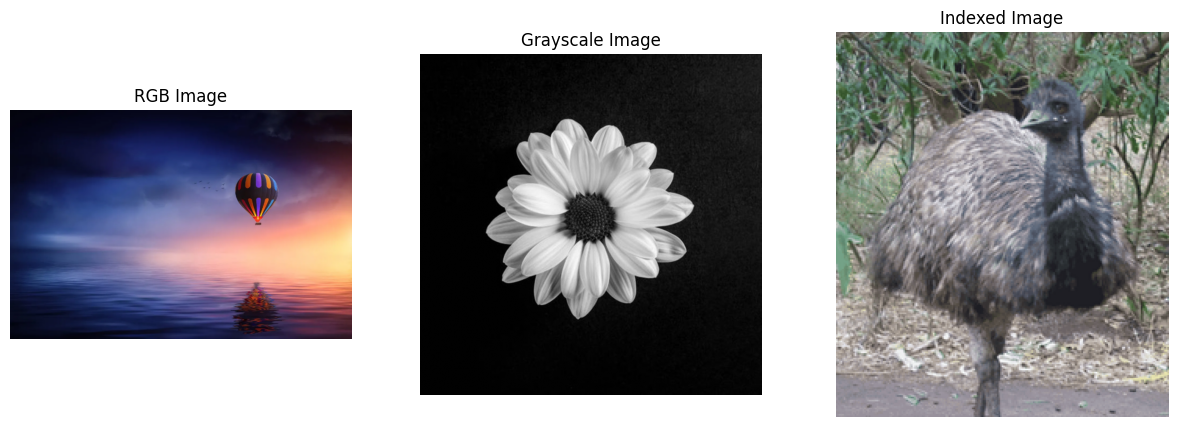

In [31]:
img_rgb_bgr = cv2.imread(rgb_path)
img_rgb = cv2.cvtColor(img_rgb_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(gray_path, cv2.IMREAD_GRAYSCALE)
img_indexed_pil = Image.open(indexed_path)
img_indexed = np.array(img_indexed_pil)
fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].imshow(img_rgb)
axs[0].set_title('RGB Image')
axs[0].axis('off')

axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

axs[2].imshow(img_indexed, cmap='gray')
axs[2].set_title('Indexed Image')
axs[2].axis('off')

plt.show()

##b) Turn the RGB image to Grayscale image.

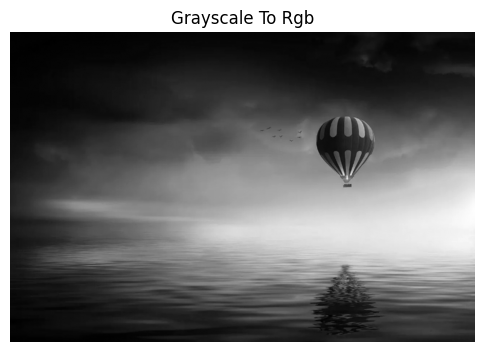

In [33]:
gray_from_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_from_rgb, cmap='gray')
plt.title("Grayscale To Rgb")
plt.axis('off')
plt.show()


##c) Turn the Indexed image to Grayscale image.

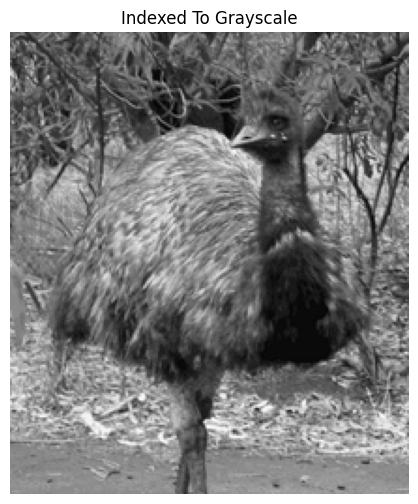

In [48]:
rgb_from_indexed = img_indexed_pil.convert('RGB')
rgb_from_indexed_np = np.array(rgb_from_indexed)
gray_from_indexed = cv2.cvtColor(rgb_from_indexed_np, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_from_indexed, cmap='gray')
plt.title("Indexed To Grayscale")
plt.axis('off')
plt.show()

##d) Turn the Indexed image to RGB image.

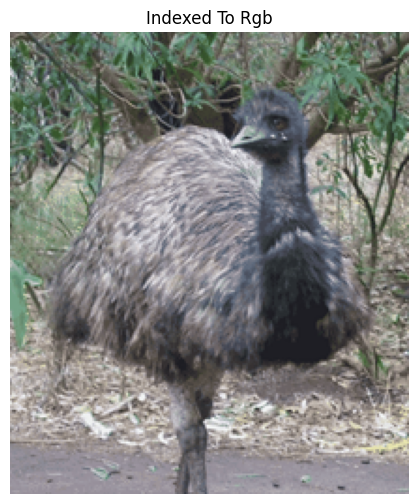

In [47]:
rgb_from_indexed = img_indexed_pil.convert('RGB')
rgb_from_indexed_np = np.array(rgb_from_indexed)
plt.figure(figsize=(6,6))
plt.imshow(rgb_from_indexed)
plt.title("Indexed To Rgb")
plt.axis('off')
plt.show()

##e) Convert the Grayscale image to a Binary image.

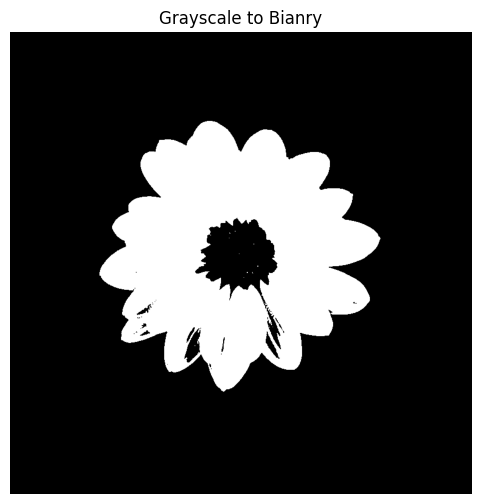

In [40]:
_, binary_img = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(6,6))
plt.imshow(binary_img, cmap='gray')
plt.title("Grayscale to Bianry")
plt.axis('off')
plt.show()


##f) Show the inverted form of that Binary image.

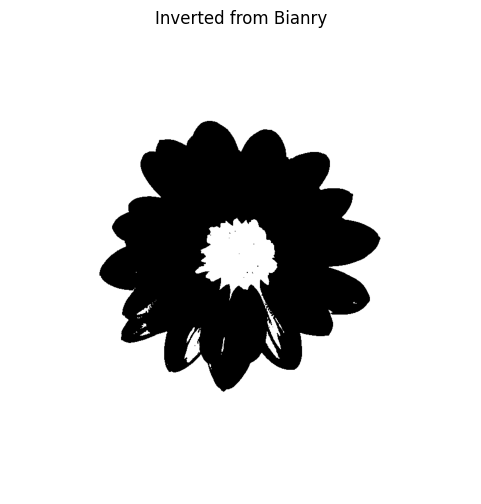

In [42]:
binary_inverted = cv2.bitwise_not(binary_img)
plt.figure(figsize=(6,6))
plt.imshow(binary_inverted, cmap='gray')
plt.title("Inverted from Bianry")
plt.axis('off')
plt.show()

##g) Show the histogram of the Grayscale image.

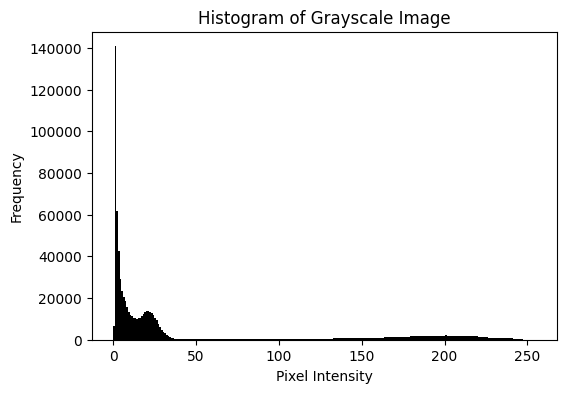

In [43]:
plt.figure(figsize=(6,4))
plt.hist(img_gray.ravel(), bins=256, range=(0,255), color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


##h) Invert the RGB image.

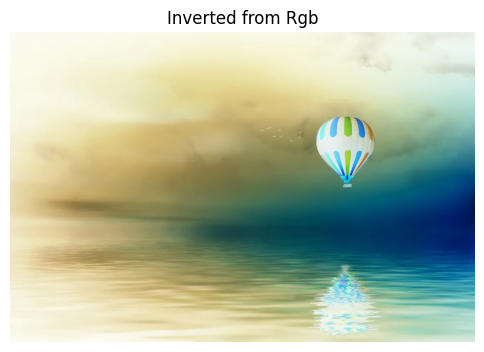

In [46]:
inverted_rgb = 255 - img_rgb
plt.figure(figsize=(6,6))
plt.imshow(inverted_rgb)
plt.title("Inverted from Rgb")
plt.axis('off')
plt.show()

##i) Blur the RGB image.

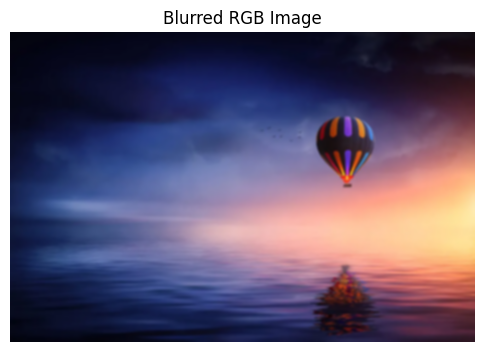

In [45]:
blurred_rgb = cv2.GaussianBlur(img_rgb, (7,7), sigmaX=2)
plt.figure(figsize=(6,6))
plt.imshow(blurred_rgb)
plt.title('Blurred RGB Image')
plt.axis('off')
plt.show()

#Reflection Questions:

##1. Which filtering method (Box, Average, Median, Gaussian) performed best for each noise type? Explain why.

Median filter and Gaussian filter worked best among all of these filters because median filteris non-linear;preserves edges,removes isolated pixel spikes very effectively as well as gaussian filter Best for Gaussian noise,uses weighted average with Gaussian distribution,smooths noise while preserving gradients and edges more than average filters.

##2. How does an Indexed image differ from an RGB or Grayscale image?

An Indexed image differs from RGB and Grayscale images in how it stores color information. Instead of storing full color values for each pixel like RGB or brightness values like Grayscale , an Indexed image stores numeric indices that refer to a color map. This palette holds the actual RGB color values, and each pixel simply points to a color in the map. This approach reduces file size by limiting the number of colors, making Indexed images more efficient for simple graphics but less suitable for detailed or color-rich photos.


##3. In real-world applications, where do you think median filtering is most commonly used?

Median filtering is most commonly used in real-world applications where images are corrupted by impulsive noise, such as salt-and-pepper noise. This includes areas like medical imaging, digital photography, surveillance video processing, and document scanning. Its edge-preserving nature makes it ideal whenever you need to reduce noise without blurring important details.

##4. How can image histogram analysis help in medical imaging, security, or photography?

Image histogram analysis is a powerful tool that helps in medical imaging, security, and photography by providing insights into the distribution of pixel intensities. In medical imaging, histograms assist in enhancing contrast to better visualize tissues or detect abnormalities. In security, analyzing histograms can help in detecting unusual changes or anomalies in surveillance footage. In photography, histograms guide photographers to adjust exposure and lighting by showing if an image is underexposed, overexposed, or well-balanced, enabling better image quality and post-processing decisions.
